#Computer Vision

Computer vision is a field of artificial intelligence that enables computers to interpret and understand visual information from the real world, such as images and videos. It involves tasks like image processing, pattern recognition, object detection, and deep learning.


#Image Representation, Processing, and Properties

Images in computer vision are represented as arrays of numerical values, where each value represents the intensity of light at a specific pixel. Image processing techniques are applied to manipulate and enhance images, such as filtering, transformation, and segmentation. Image properties include attributes like size, resolution, color depth, and spatial dimensions.

11490434/11490434 [==============================] - 0s 0us/step


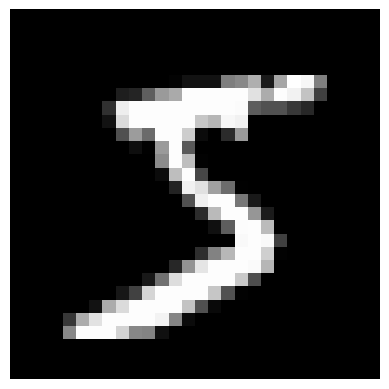

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Display an example image
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

#Pattern Recognition

Pattern recognition involves identifying and interpreting recurring patterns or structures within visual data. It includes techniques like feature extraction, classification, and clustering to recognize objects or patterns in images.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Train a k-nearest neighbors classifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705


#Object Detection

Object detection involves locating and classifying objects within images or videos. It typically uses machine learning or deep learning algorithms to detect and localize objects by drawing bounding boxes around them.



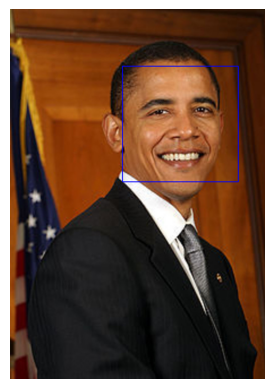

In [ ]:
import cv2

# Load pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the example image
image = cv2.imread("example_image.jpg")

if image is not None:
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw bounding boxes around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("Error: Unable to load the image file.")

#Deep Learning

Deep learning in computer vision involves using artificial neural networks with multiple layers to learn hierarchical representations of visual data. Convolutional Neural Networks (CNNs) are commonly used for tasks like image classification, object detection, and image segmentation.



In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Add a channel dimension (for grayscale images)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1410 - accuracy: 0.9580 - val_loss: 0.0467 - val_accuracy: 0.9838
Epoch 2/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0294 - val_accuracy: 0.9890
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0329 - val_accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0267 - val_accuracy: 0.9908
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.0295 - accuracy: 0.9897
Test Accuracy: 0.9897000193595886
